# Import Package

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import locale
from sklearn.feature_extraction.text import TfidfVectorizer
from plotly.subplots import make_subplots

# Load Data

## Load data from analyzed folder

In [2]:
mlbb = pd.read_csv("../data/analyzed/MLBB_Reviews.csv")
hok = pd.read_csv("../data/analyzed/HOK_Reviews.csv")

# Sort dataframes by date column

# Set locale to Indonesia because in column date is using Indonesian Format Date
locale.setlocale(locale.LC_ALL, 'id_ID') 

mlbb['date'] = pd.to_datetime(mlbb['date'], format='%d %B %Y')
hok['date'] = pd.to_datetime(hok['date'], format='%d %B %Y')
mlbb = mlbb.sort_values(by="date")
hok = hok.sort_values(by="date")
print(f"MLBB start from:\t{mlbb.date.min().strftime('%d %B %Y')} - {mlbb.date.max().strftime('%d %B %Y')}")
print(f"HOK start from:\t\t{hok.date.min().strftime('%d %B %Y')} - {hok.date.max().strftime('%d %B %Y')}")

MLBB start from:	31 Juli 2024 - 14 Januari 2025
HOK start from:		24 Juli 2024 - 14 Januari 2025


### Dataset Nomenclature

| **Column Name**     | **Description**                                                                                       |
|----------------------|-----------------------------------------------------------------------------------------------------|
| **Name**            | The name of the person who sent the feedback.                                                       |
| **Date**            | The date when the feedback was sent.                                                                |
| **Star**            | The rating given by the person, typically on a scale (e.g., 1-5 stars).                             |
| **Comment**         | The textual feedback or review provided by the person.                                              |
| **Comment_Prep**    | The preprocessed version of the comment (e.g., lowercased, stemmed, stopwords, etc).                   |
| **Sentiment**       | The sentiment classification of the feedback (e.g., positif, netral, negatif).                   |

# Exploratory Data Analysis

## Is there missing values?

In [3]:
print(f"in MLBB=====\n{mlbb.isna().sum()}")
print(f"in HoK======\n{hok.isna().sum()}")

# Drop missing value
mlbb.dropna(inplace=True)
hok.dropna(inplace=True)

in MLBB=====
name            0
date            0
star            0
comment         0
comment_prep    2
sentiment       0
dtype: int64
in HoK======
name            0
date            0
star            0
comment         0
comment_prep    1
sentiment       0
dtype: int64


## Analys Distribution of Sentiments

In [4]:
fig = make_subplots(rows=1, cols=2, subplot_titles=["Mobile Legends: Bang bang", "Honor of Kings"], specs=[[{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(
    go.Pie(labels=mlbb["sentiment"].value_counts().index, values=mlbb["sentiment"].value_counts().values, name="MLBB"),
    row=1, col=1
)
fig.add_trace(
    go.Pie(labels=hok["sentiment"].value_counts().index, values=hok["sentiment"].value_counts().values, name="HoK"),
    row=1, col=2
)

fig.update_layout(
    title=dict(
        text="Sentiment Distribution Comparison (2024 July - 2025 Jan)",
        x=0.5,
        font=dict(size=24)
    )
)
fig.show()

## N-gram analysis

In [5]:
def ngram_analyze(df: pd.DataFrame, dataset_name: str, text_column: str, n_gram: int = 1, top_n: int = 20) -> None:
    vectorizer = TfidfVectorizer(ngram_range=(n_gram, n_gram))
    X = vectorizer.fit_transform(df[text_column])

    word_tfidf = dict(
        zip(
            vectorizer.get_feature_names_out(),
            X.sum(axis=0).tolist()[0]
        )
    )

    wordcloud = WordCloud(width=1280, height=720, background_color="white").generate_from_frequencies(word_tfidf)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    word_tfidf_df = pd.DataFrame.from_dict(word_tfidf, orient="index", columns=["tfidf"])
    word_tfidf_df = word_tfidf_df.sort_values("tfidf", ascending=False).head(top_n).reset_index().rename(columns={"index": "word"})

    fig = px.bar(
        word_tfidf_df,
        x="word",
        y="tfidf",
        title=f"Top {top_n} {'Unigrams' if n_gram == 1 else 'Bigrams' if n_gram == 2 else 'Trigrams'} by TF-IDF Score in {dataset_name if dataset_name != '' else ''}'s Dataset",
        labels={"word": "Word", "tfidf": "TF-IDF Score"},
    )

    fig.show()

### Unigram (1-gram)

### Mobile Legends: Bang bang

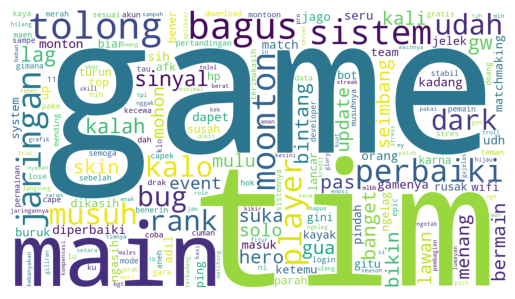

In [6]:
ngram_analyze(mlbb, text_column="comment_prep", dataset_name="MLBB", n_gram=1)

### Honor of Kings

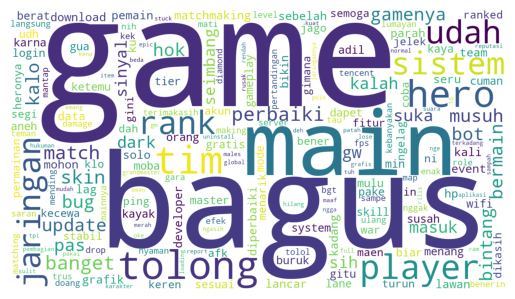

In [7]:
ngram_analyze(hok, text_column="comment_prep", dataset_name="HoK", n_gram=1)

## Bigram (2-gram)

### Mobile Legends: Bang bang

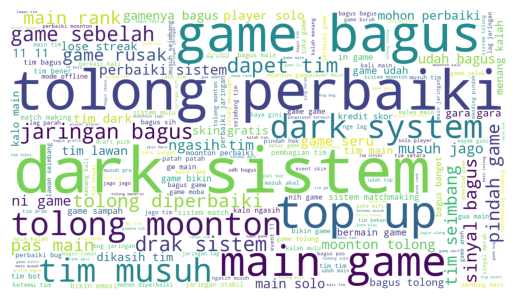

In [8]:
ngram_analyze(mlbb, text_column="comment_prep", dataset_name="MLBB", n_gram=2)

### Honor of Kings

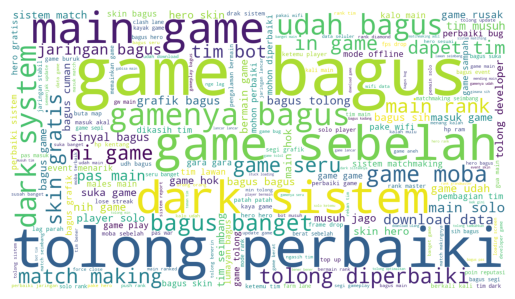

In [9]:
ngram_analyze(hok, text_column="comment_prep", dataset_name="HoK", n_gram=2)

## Trigram (3-gram)

### Mobile Legends: Bang bang

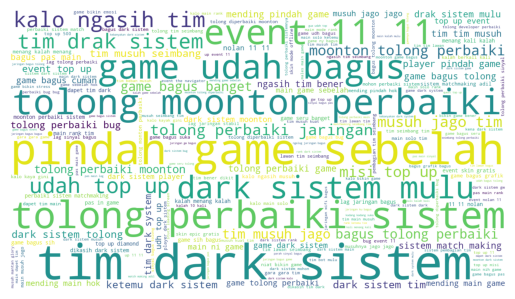

In [10]:
ngram_analyze(mlbb, text_column="comment_prep", dataset_name="MLBB", n_gram=3)

### Honor of Kings

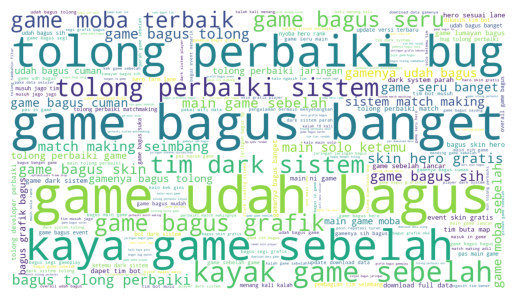

In [11]:
ngram_analyze(hok, text_column="comment_prep", dataset_name="HoK", n_gram=3)